In [ ]:
!pip install -U sentence-transformers

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 4.9 MB 15.8 MB/s 
     |████████████████████████████████| 1.3 MB 63.7 MB/s 
     |████████████████████████████████| 163 kB 58.2 MB/s 
     |████████████████████████████████| 6.6 MB 34.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9d92f78416a7f775bf7bf88c1d91229245d14b494391b250a05753a6142539bf
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1.1 - Bạn hãy viết code cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương
ứng (kq.txt) và mô tả ngắn gọn về cấu trúc của trang Web trên? (10 điểm)

In [ ]:
resp = requests.get('http://quotes.toscrape.com/')

file = open("kq.txt", "wb")
file.write(resp.content)

11053

1.2 - Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:

a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến
'result’, hiển thị giá trị biến 'result’ ra màn hình? (5 điểm)

In [ ]:
soup = BeautifulSoup(resp.content, "html.parser")
result = soup.find_all('div', class_='quote')
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

**b**. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author" và in kết quả ra màn hình? (5 điểm)

In [ ]:
for quote in result:
    author_name = quote.find('small', class_='author').text
    print(author_name)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


c. Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in ra màn hình các nội dung (15 điểm)

. Tên tác giả

. Đường link của tác giả

. Ngày tháng năm sinh

. Và câu nói nổi tiếng của tác giả

In [ ]:
all_quotes = []
birth_author = []
def tacgiaLink():
  for i in range(1,7):
      url = f'https://quotes.toscrape.com/page/{i}/'
      page = urlopen(url)
      soup = BeautifulSoup(page, 'html.parser')
      # Bai 1.1:
      result = soup.find_all('div', class_='quote')

      for quote in result:
          author_name = quote.find('small', class_='author').text
          link = quote.find('a').get('href')
          author_link = 'http://quotes.toscrape.com/' + link
          author_caunoi = quote.find('span', class_='text').text

          def author_dob(author_link):
              url_dob = requests.get(author_link)
              url_dob_html = url_dob.content
              soup = BeautifulSoup(url_dob_html)
              dob_au = soup.find("span",class_="author-born-date")
              birth_year_text = dob_au.text
              birth_year = birth_year_text.replace(' ','')[-4:]
              birth_author.append(birth_year)
              return dob_au.text
          single_quote = [author_name, author_link, author_dob(author_link),author_caunoi]
          all_quotes.append(single_quote)
tacgiaLink()

d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1 dòng dữ liệu.

Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang web trên một cách tự động theo code của các ý trên? (5 điểm)

In [ ]:
df = pd.DataFrame(all_quotes, columns=['Name', 'Link', 'Birthday', 'Quote'])
df.to_csv('Quotes.csv', index=False)

2.1. Xử lý dữ liệu- Data Imputation (5 điểm):
- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?
- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?

In [ ]:
#Đọc dữ liệu file Quotes.csv sau đó lưu vào biến data
data = pd.read_csv("Quotes.csv")

#Sử dụng fillna() để điền vào các dữ liệu trống
data['Birthday'] = data["Birthday"].fillna("No Birthday")

In [ ]:
death = []
author= []
age = []
session = requests.Session()

  # Tạo payload để đăng nhập vào trang web
payload ={'username':'[519h0362]',
            'password':'[519h0362]'}
  # Post payload
s = session.post("http://quotes.toscrape.com/login", data=payload)

  # Truy cập vào từng trang để cào dữ liệu
for i in range(1,7):
    s = session.get(f'https://quotes.toscrape.com/page/{i}/')
    soup = BeautifulSoup(s.text, 'html.parser')
    #Tìm tất cả các thẻ div có class là quote
    logined = soup.find_all('div', class_='quote')
    for login in logined:
        # Tìm tất cả các thẻ a có trong login
        link_dob = login.find_all('a')
        # link_dob[1] là thẻ a truy cập vào trang chứa ngày sinh
        x = link_dob[1].get('href')
        url = x
        page = urlopen(url)
        soup = BeautifulSoup(page, 'html.parser')

        # Tim tất cả các thẻ span có itemprop là name
        authorname = soup.find('span', itemprop = 'name').text
        # Nếu thẻ div chứa ngày mất không có thì mặc định năm mất là năm nay
        if soup.find('div', itemprop='deathDate') == None:
           dead_year = date.today().year
           #Lưu vào mảng dead_year
           death.append(dead_year)
        else:
            # Sau khi check có năm mất thì ta sẽ thực hiện lấy dữ liệu trong thẻ
            # Sau đó lấy 4 kí tự cuối đó cũng chính làm năm sinh để lưu vào
            # mảng năm mất.
            dead_year = soup.find('div', itemprop='deathDate').text
            dead_year = dead_year.replace(' ','')[-4:]
            death.append(dead_year)
            # Lấy năm mất và năm sinh lấy được trừ nhau để lấy tuổi tác giả
        for i in range(len(death)):
            a = int(death[i]) - int(birth_author[i])
        # Lưu tuổi vào mảng author
        author.append(a)

In [ ]:
#Write dataframe after edit to csv
data.to_csv(r'Quotes.csv',sep=',', encoding='utf-8-sig',index=False)

# Thêm cột tuổi vào Quotes.csv
data.insert(4, "Age", author, True)
data.to_csv(r'Quotes.csv',sep=',', encoding='utf-8-sig',index=False)

2.2. Khám phá dữ liệu- Data Exploration (15 điểm):

Bạn cần khám phá dữ liệu để hiển thị một số thông tin thống kê và phân tích của
tập dữ liệu đã cho. Chẳng hạn như:
- Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,
- Thống kê về năm sinh và độ tuổi của các tác giả,
- Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, ...
- Thống kê về các từ được sử dụng trong các câu nói,
- Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng,

- Phân tích, trực quan mối quan hệ giữa các tác giả với nhau,...
Trên đây chỉ là một số gợi ý, bạn có thể đề xuất thêm các phân tích, thống kê khác.

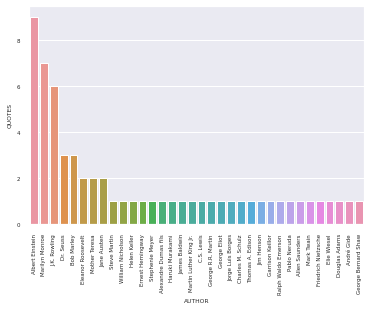

In [ ]:
# Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu
# Số câu nói nổi tiếng của các tác giả trong tập dữ liệu

data = pd.read_csv("Quotes.csv")
a = data["Name"].value_counts()
a = a.reset_index()
a.columns = ['AUTHOR', 'QUOTES']

sns.set(font_scale = 0.5)

ax = sns.barplot(x = 'AUTHOR',
            y = 'QUOTES',
            data = a)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

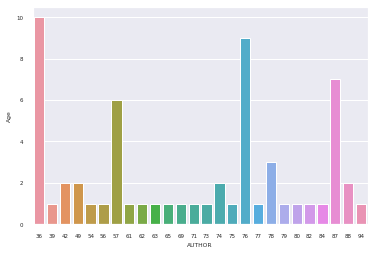

In [ ]:
# Thống kê về độ tuổi của tác giả
data = pd.read_csv("Quotes.csv")
a = data["Age"].value_counts()
a = a.reset_index()
a.columns = ['AUTHOR', 'Age']

sns.set(font_scale = 0.5)

ax = sns.barplot(x = 'AUTHOR',
            y = 'Age',
            data = a)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()

Tác giả có câu châm ngôn nhiều từ nhất là:  Marilyn Monroe  với số từ trong một châm ngôn là:  201  từ


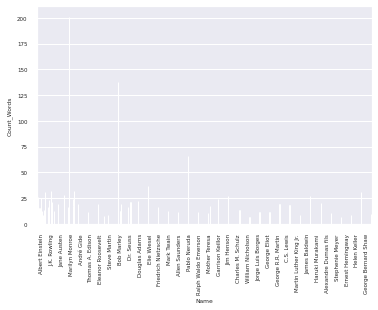

In [ ]:
#Thêm vào Quotes cột Counts_words, và đếm số khoảng cách trong cột quote để tính số từ trong đó
data.insert(5,"Count_Words", data["Quote"].apply(lambda x: len(str(x).split(' '))), True)

# Lấy ra 3 cột Name Quote và Count_Words để vẽ sơ đồ
df_count_word = data[['Name','Quote','Count_Words']]
gs = sns.barplot(
    data=df_count_word,
    x="Name", y="Count_Words", hue="Quote",
)
gs.legend_.remove()
df_count_word = df_count_word.sort_values(by=['Count_Words'], ascending=False)

gs.set_xticklabels(gs.get_xticklabels(),rotation = 90)

#Sắp xếp các tên tác giả vào một mảng mà người đứng đầu là người có số từ lớn nhất
list_count_word = df_count_word['Name'].tolist()

#Sắp xếp số từ đếm được vào một danh sách
number_of_word = df_count_word['Count_Words'].tolist()
#Hiển thị tác giả sở hữu số câu nhiều từ nhất và số từ trong câu đó.
print("Tác giả có câu châm ngôn nhiều từ nhất là: ",list_count_word[0], ' với số từ trong một châm ngôn là: ', number_of_word[0], ' từ')


In [ ]:
#Thống kê về số từ sử dụng trong câu nói
from collections import Counter
#Sử dụng thư viện Counter để tách và thống kê số lần xuất hiện của các từ sử dụng trong cột Quote
sotu_solanxuathien = Counter(" ".join(df["Quote"]).split()).most_common(100)
#In số từ được thống kê và số lần xuất hiện của chúng ra màn hình
for i in sotu_solanxuathien:
    print(i)

('you', 55)
('is', 49)
('to', 39)
('a', 37)
('of', 25)
('not', 25)
('the', 24)
('that', 20)
('I', 20)
('and', 18)
('be', 16)
('in', 16)
('but', 16)
('it', 14)
('your', 14)
('can', 14)
('what', 10)
('or', 10)
('have', 9)
('her', 9)
('she', 9)
('more', 8)
('are', 8)
('who', 8)
('love', 8)
('“The', 7)
('as', 7)
('we', 7)
('“It', 7)
('The', 7)
("it's", 7)
('for', 7)
('never', 7)
('make', 7)
('do', 7)
('no', 7)
('our', 6)
('than', 6)
('“I', 6)
('just', 6)
('up', 6)
('will', 6)
('so', 6)
('“If', 6)
('may', 6)
('think', 6)
('my', 6)
('without', 5)
('like', 5)
('But', 5)
('them', 5)
('give', 5)
('because', 5)
('keep', 5)
("don't", 5)
('when', 5)
('one', 5)
('only', 4)
('live', 4)
('good', 4)
('man', 4)
('“A', 4)
('know', 4)
('going', 4)
('get', 4)
('-', 4)
('if', 4)
('find', 4)
('makes', 4)
("doesn't", 4)
('at', 4)
('great', 4)
('about', 4)
('opposite', 4)
('read', 4)
('“There', 3)
('other', 3)
('has', 3)
('must', 3)
('genius', 3)
('life', 3)
("you're", 3)
('most', 3)
('much', 3)
('all', 3)
('

{'love': 1.0, 'make': 0.6875, 'life': 0.625, 'one': 0.625, 'know': 0.5, 'live': 0.4375, 'never': 0.4375, 'will': 0.4375, 'think': 0.4375, 'friend': 0.4375, 'good': 0.375, 'give': 0.375, 'keep': 0.375, 'thing': 0.375, 'may': 0.375, 'read': 0.375, 'without': 0.3125, 'go': 0.3125, 'way': 0.3125, 'thinking': 0.25, 'everything': 0.25, 'man': 0.25, 'going': 0.25, 'find': 0.25, 'always': 0.25, 'great': 0.25, 'opposite': 0.25, 'indifference': 0.25, 'eye': 0.25, 'music': 0.25, 'book': 0.25, 'world': 0.1875, 'must': 0.1875, 'genius': 0.1875, 'day': 0.1875, 'matter': 0.1875, 'well': 0.1875, 'much': 0.1875, 'fail': 0.1875, 'believe': 0.1875, 'every': 0.1875, 'hurt': 0.1875, 'us': 0.1875, 'time': 0.1875, 'everyone': 0.1875, 'girl': 0.1875, 'see': 0.1875, 'harry': 0.125, 'two': 0.125, 'though': 0.125, 'nothing': 0.125, 'miracle': 0.125, 'stupid': 0.125, 'beauty': 0.125, 'better': 0.125, 'absolutely': 0.125, 'become': 0.125, 'loved': 0.125, 'woman': 0.125, 'tea': 0.125, 'mess': 0.125, 'truth': 0.125,

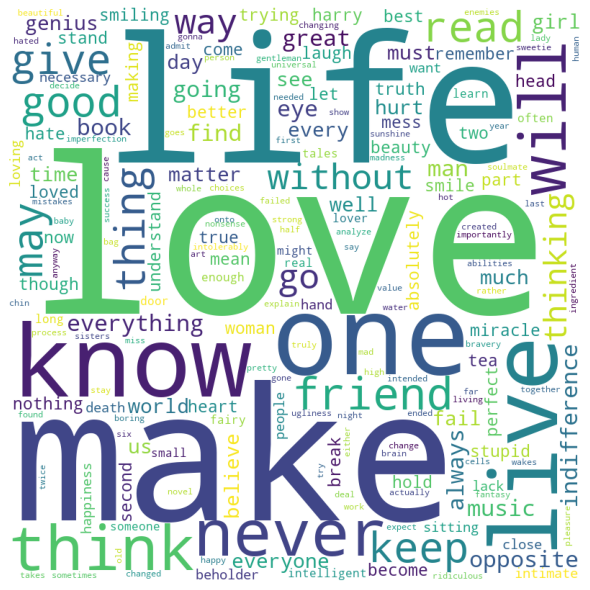

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
df2 = data.copy()
# iterate through the csv file
for val in df2['Quote']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# filtered_words = [w for w in allwords if not w in stopwords]

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

print(wordcloud.words_)
# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
wordcloud.to_file("count_words.png")

In [ ]:
# Lấy dữ liệu từ cột name trong file csv sau đó lưu vào list
authors = data['Name'].tolist()

#2.3
df2 = data.copy()

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
  # create an index for each row
  doc = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
  df = pd.DataFrame(data=wm.toarray(), index=doc,columns=feat_names)
  return(df)


# instantiate the vectorizer object
cvec = CountVectorizer()

# chuyển đổi các tài liệu thành một ma trận
wm = cvec.fit_transform(df2['Quote'])

# truy xuất các thuật ngữ được tìm thấy trong kho tài liệu
tokens = cvec.get_feature_names()
# print(tokens)
# create a dataframe from the matrix
wm2df = wm2df(wm, tokens)
# print(wm2df)

authors = df2['Name'].tolist()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# chia tập dữ liệu train và test với tỉ lệ test_size=0.1 và random_state=10
features_train, features_test, labels_train, labels_test = train_test_split(wm, authors, test_size=0.1, random_state=10)

# print(features_test)

# Khởi tạo Multinomial NB model
nb = MultinomialNB()

# Fit tập dữ tập liệu huấn luyện (training set) với Multinomial NB model vừa tạo
nb.fit(features_train, labels_train)

# kiểm tra độ chính xác
score = accuracy_score(labels_test,nb.predict(features_test))

# Chuyển đổi một tập hợp các tài liệu văn bản thành một ma trận số lượng mã tokens.
text = ["There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle."]
transformed = cvec.transform(text)

# nb.predict(transformed) chứa các giá trị số tương ứng với danh mục.
print('The author is:' ,nb.predict(transformed))

The author is: ['Albert Einstein']


In [ ]:
dict_df = {}
list_Of_author = data['Name'].unique().tolist()

# Khởi tạo dữ liệu kiểu dictionary
for author in list_Of_author:
    tmp_df = df2.loc[df2['Name'] == author]
    key = author
    dict_df.setdefault(key,[])
    tmp_df.reset_index()
    list_quotes = tmp_df['Quote'].tolist()
    string = ' '.join(list_quotes)
    dict_df[key] = string

key_list_author = list(dict_df.keys())
val_list_quote = list(dict_df.values())

# print(dict_df)

# model nhúng câu, văn bản và hình ảnh.
model_ST = SentenceTransformer('bert-base-nli-mean-tokens')

#Các câu được mã hóa bằng cách gọi model_ST.encode ()
quote_endcode = model_ST.encode(val_list_quote)
# print(quote_endcode.shape)


# print(quote_endcode)
for j in range(len(quote_endcode)):
    temp_quote_endcode = quote_endcode[np.arange(len(quote_endcode))!=j]

    #so sánh 1 câu với các câu nói khác
    similarity = cosine_similarity([quote_endcode[j]], temp_quote_endcode)
    list_key = key_list_author.copy()
    list_key.pop(j)

    #sắp xếp độ tương đồng giữa các tác giả với nhau
    for n in range(len(similarity[0])-1, 0, -1):
        for i in range(n):
            if(similarity[0][i] < similarity[0][i+1]):
                similarity[0][i], similarity[0][i+1] = similarity[0][i+1], similarity[0][i]
                list_key[i], list_key[i+1] = list_key[i+1], list_key[i]
    # print(list_key)
    print("Authors with the highest similarity to ",key_list_author[j], 'respectively are:', list_key)

Authors with the highest similarity to  Albert Einstein respectively are: ['Bob Marley', 'J.K. Rowling', 'Mother Teresa', 'Dr. Seuss', 'Marilyn Monroe', 'James Baldwin', 'Jane Austen', 'Charles M. Schulz', 'Helen Keller', 'Friedrich Nietzsche', 'Haruki Murakami', 'Pablo Neruda', 'C.S. Lewis', 'André Gide', 'Elie Wiesel', 'George R.R. Martin', 'Garrison Keillor', 'George Bernard Shaw', 'Douglas Adams', 'Alexandre Dumas fils', 'Jim Henson', 'Eleanor Roosevelt', 'Ernest Hemingway', 'Mark Twain', 'Thomas A. Edison', 'Jorge Luis Borges', 'Allen Saunders', 'George Eliot', 'Stephenie Meyer', 'Steve Martin', 'Ralph Waldo Emerson', 'William Nicholson', 'Martin Luther King Jr.']
Authors with the highest similarity to  J.K. Rowling respectively are: ['Mother Teresa', 'Bob Marley', 'Marilyn Monroe', 'Albert Einstein', 'James Baldwin', 'Dr. Seuss', 'André Gide', 'Jane Austen', 'Alexandre Dumas fils', 'Friedrich Nietzsche', 'Jim Henson', 'Elie Wiesel', 'Helen Keller', 'Douglas Adams', 'Pablo Neruda'